In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datos = np.genfromtxt("datos_tiempo_angulo.txt", delimiter = ",").T

#largo en metros
r_0 = 0.875

angle = datos[0]
time = datos[1]
#WARNING: CODIGO SPAGHETTI ABAJO

#Error en la medicion del angulo
angle_err_deg=0.5
#Error en radianes
angle_err_rad = angle_err_deg*2*np.pi/360

#Arreglo error en radianes para cada elemento de array de angulos
angle_err_rad_array = np.ones(10)*angle_err_rad
angle_err_rad_array[0] = 0

#Mediciones de los angulos
angle_unique_deg = np.array([0,3,4,5,7,8,13,20,35,39])
angle_unique_rad = 2*np.pi/360*angle_unique_deg

#####################
#Mediciones del tiempo
time_unique_0 = time[0]
time_error_unique_0 = 0

time_unique_3 = time[1]
time_error_unique_3 = 0.5

time_unique_4 = time[2]
time_error_unique_4 = 0.5

time_5 = time[3:8]
time_unique_5 = np.mean(time_5)
time_std_unique_5 = np.std(time_5)
time_errorstd_unique_5 = time_std_unique_5/np.sqrt(len(time_5))

time_7 = time[23:50]
time_unique_7 = np.mean(time_7)
time_std_unique_7 = np.std(time_7)
time_errorstd_unique_7 = time_std_unique_7/np.sqrt(len(time_7))

time_unique_8 = time[20]
time_error_unique_8 = 0.5

time_13= time[12:19]
time_unique_13 = np.mean(time_13)
time_std_unique_13 = np.std(time_13)
time_errorstd_unique_13 = time_std_unique_13/np.sqrt(len(time_13))

time_unique_20 = time[22]
time_error_unique_20 = 0.5

time_unique_35 = time[23]
time_error_unique_35 = 0.5

time_unique_39 = time[21]
time_error_unique_39 = 0.5
#Organizado tal que tenemos un único valor de tiempo, con un único valor de errores
########################

#Arreglo de tiempos, con el mismo largo que angle_unique_rad
time_unique_array = np.array(
    [time_unique_0,time_unique_3,time_unique_4,time_unique_5,
     time_unique_7,time_unique_8,time_unique_13,time_unique_20,
     time_unique_35,time_unique_39]
)
#Arreglo de errores en la medicion del tiempo
time_error_unique_array = np.array(
    [time_error_unique_0,time_error_unique_3,time_error_unique_4,time_errorstd_unique_5,
     time_errorstd_unique_7,time_error_unique_8,time_errorstd_unique_13,time_error_unique_20,
     time_error_unique_35,time_error_unique_39
    ]
)

\begin{align*}
    g&= \frac{-r_0}{t^2(\mu-\theta)}\\
    \frac{dg}{g} &= \frac{1}{r_0}dr_0 + 2\frac{1}{t}dt + \frac{1}{\mu}d\mu + \frac{1}{\theta}d\theta\\
    \frac{\Delta g}{g} &= \frac{\Delta r}{r} + 2\frac{\Delta t}{t}+ \frac{\Delta \mu}{\mu}+\frac{\Delta \theta}{\theta}
\end{align*}

In [3]:
#Funcion g en mu, pues no conocemos mu. Por esto, mu es exacto, y no necesitamos su error
g = lambda mu: -2*r_0/((time_unique_array**2)*(mu-(angle_unique_rad)))

r = r_0
delta_r = 0.0005

t = time_unique_array
delta_t = time_error_unique_array

theta = angle_unique_rad
delta_theta = angle_err_rad_array

delta_g = lambda mu: g(mu)*(delta_r/(r) + 2*delta_t/t + delta_theta/theta)

C:\Users\javie\AppData\Local\Temp\ipykernel_9560\981308622.py:13: RuntimeWarning: invalid value encountered in divide
  delta_g = lambda mu: g(mu)*(delta_r/(r) + 2*delta_t/t + delta_theta/theta)


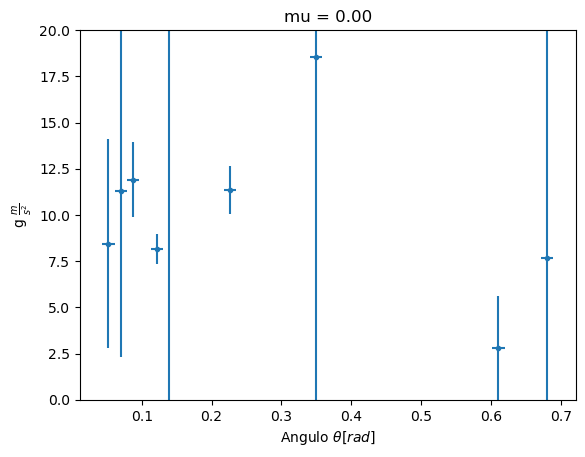

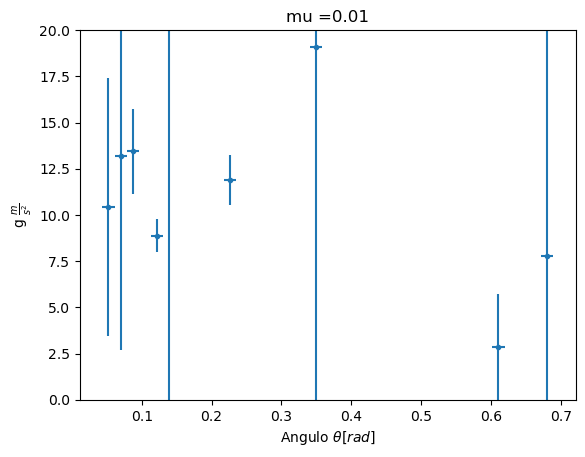

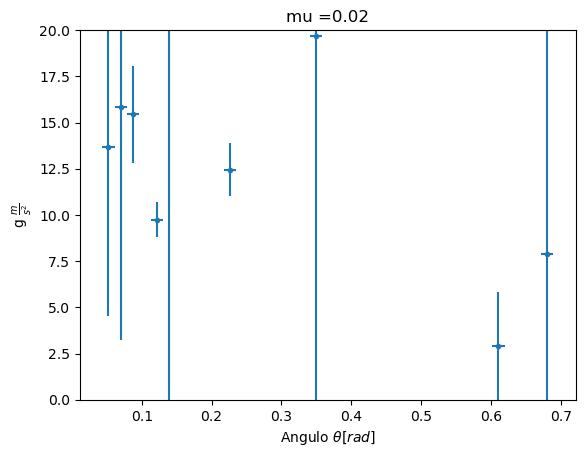

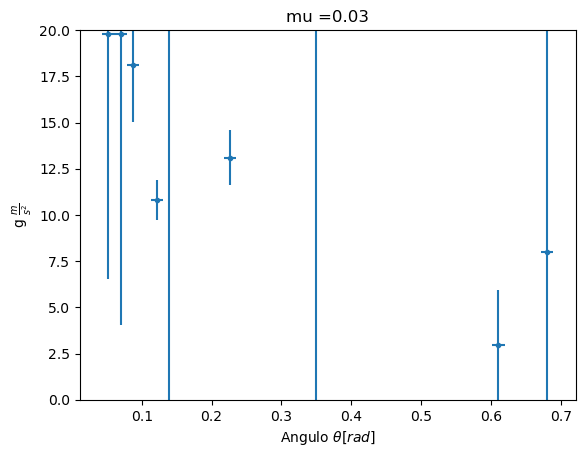

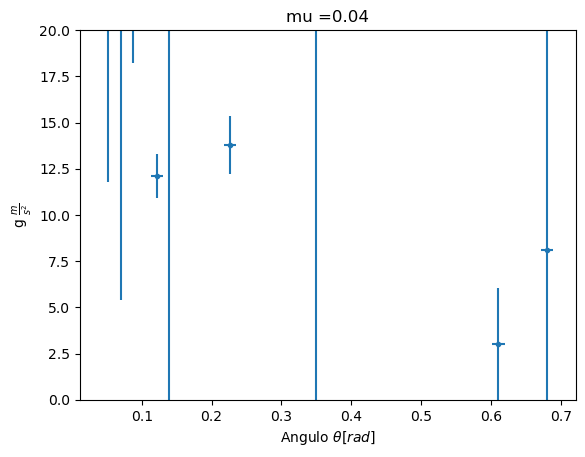

In [4]:
mu = np.array([0.00,0.01,0.02,0.03,0.04])
plt.errorbar((angle_unique_rad),g(mu[0]),xerr = angle_err_rad_array, yerr = delta_g(mu[0]) ,fmt = '.')
plt.title("mu = 0.00")
plt.xlabel("Angulo $\\theta [rad]$")
plt.ylabel("g $\\frac{m}{s^2}$")
plt.ylim(0,20)
plt.savefig("grafico_g-theta_mu0")
plt.show()
plt.errorbar((angle_unique_rad),g(mu[1]),xerr = angle_err_rad_array, yerr = delta_g(mu[1]) ,fmt = '.')
plt.title(f"mu ={mu[1]}")
plt.xlabel("Angulo $\\theta [rad]$")
plt.ylabel("g $\\frac{m}{s^2}$")
plt.ylim(0,20)
plt.savefig("grafico_g-theta_mu1")

plt.show()
plt.errorbar((angle_unique_rad),g(mu[2]),xerr = angle_err_rad_array, yerr = delta_g(mu[2]) ,fmt = '.')
plt.title(f"mu ={mu[2]}")
plt.xlabel("Angulo $\\theta [rad]$")
plt.ylabel("g $\\frac{m}{s^2}$")
plt.ylim(0,20)
plt.savefig("grafico_g-theta_mu2")

plt.show()
plt.errorbar((angle_unique_rad),g(mu[3]),xerr = angle_err_rad_array, yerr = delta_g(mu[3]) ,fmt = '.')
plt.title(f"mu ={mu[3]}")
plt.xlabel("Angulo $\\theta [rad]$")
plt.ylabel("g $\\frac{m}{s^2}$")
plt.ylim(0,20)
plt.savefig("grafico_g-theta_mu3")

plt.show()
plt.errorbar((angle_unique_rad),g(mu[4]),xerr = angle_err_rad_array, yerr = delta_g(mu[4]) ,fmt = '.')
plt.title(f"mu ={mu[4]}")
plt.xlabel("Angulo $\\theta [rad]$")
plt.ylabel("g $\\frac{m}{s^2}$")
plt.ylim(0,20)
plt.savefig("grafico_g-theta_mu4")

plt.show()
